# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



BALLPARKS DATASET ANALYSIS

1. DATA SUMMARY

Dataset Overview:
  - Total ballparks: 30
  - Total features: 13
  - No missing values!

Features in the dataset:
  1. team_name
  2. ballpark
  3. left_field
  4. center_field
  5. right_field
  6. min_wall_height
  7. max_wall_height
  8. hr_park_effects
  9. extra_distance
  10. avg_temp
  11. elevation
  12. roof
  13. daytime

First few ballparks:
  team_name                     ballpark  elevation  hr_park_effects
0       ATL                  Truist Park       1001               99
1        AZ                  Chase Field       1086               84
2       BAL  Oriole Park at Camden Yards         33              107
3       BOS                  Fenway Park         21              102
4       CHC                Wrigley Field        595               97

2. FIVE INTERESTING QUESTIONS

1. Which ballparks are most hitter-friendly (highest home run rates)?
2. How does elevation affect home run park effects?
3. Which ballparks have the most

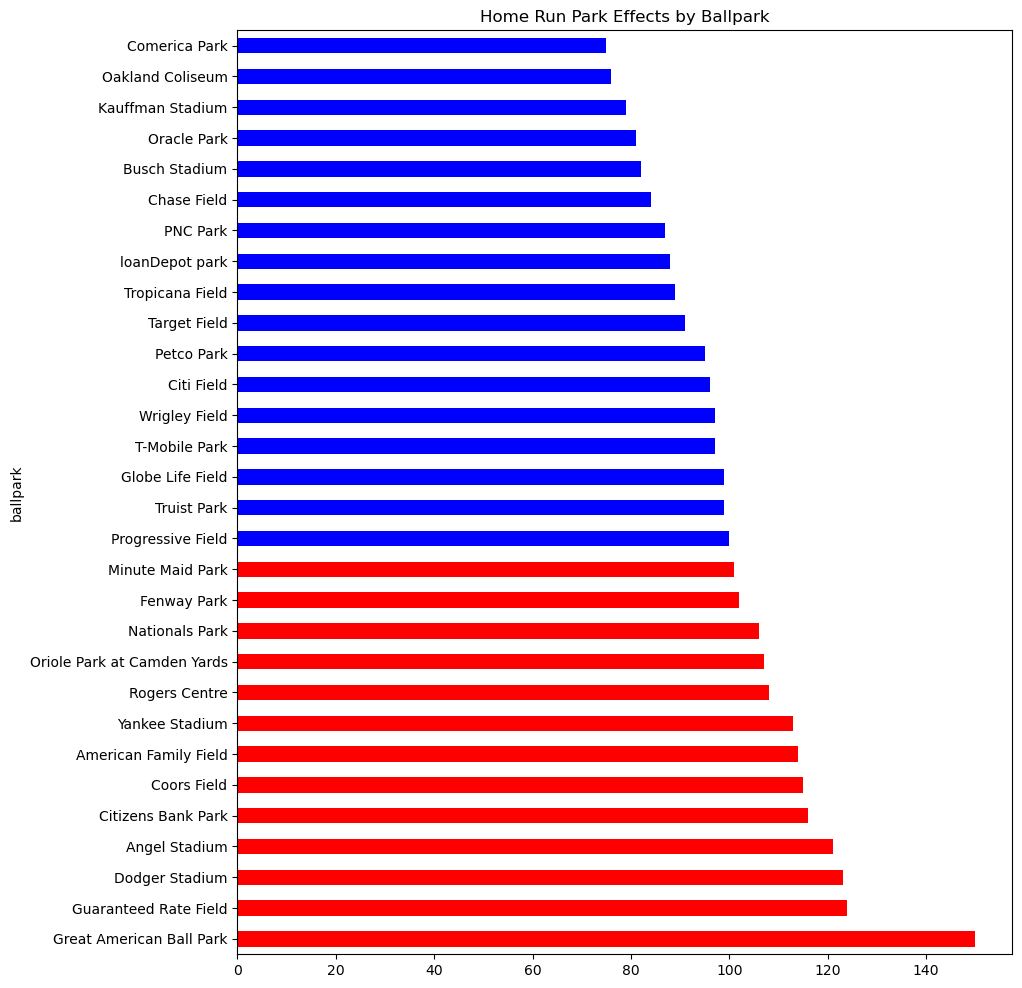

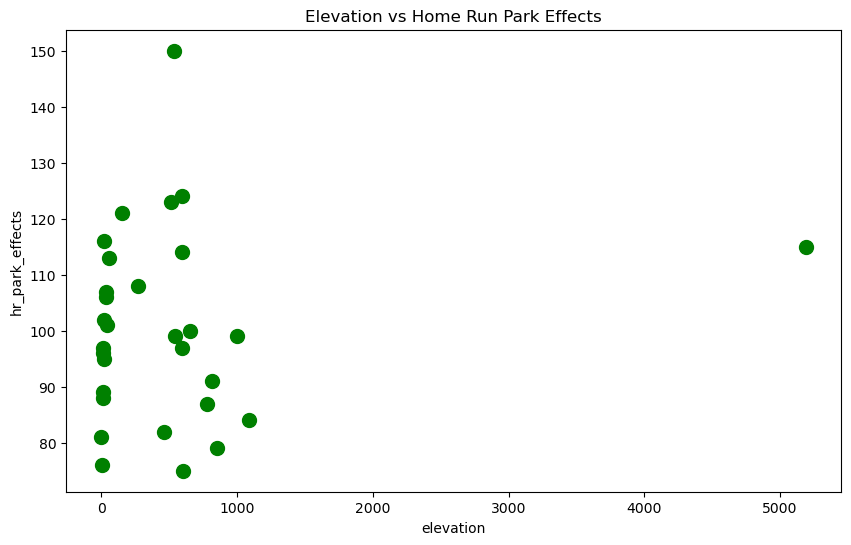

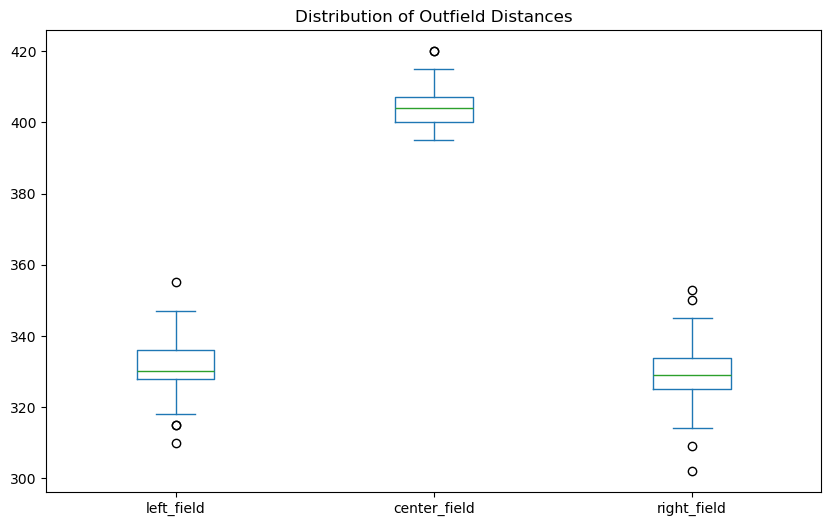

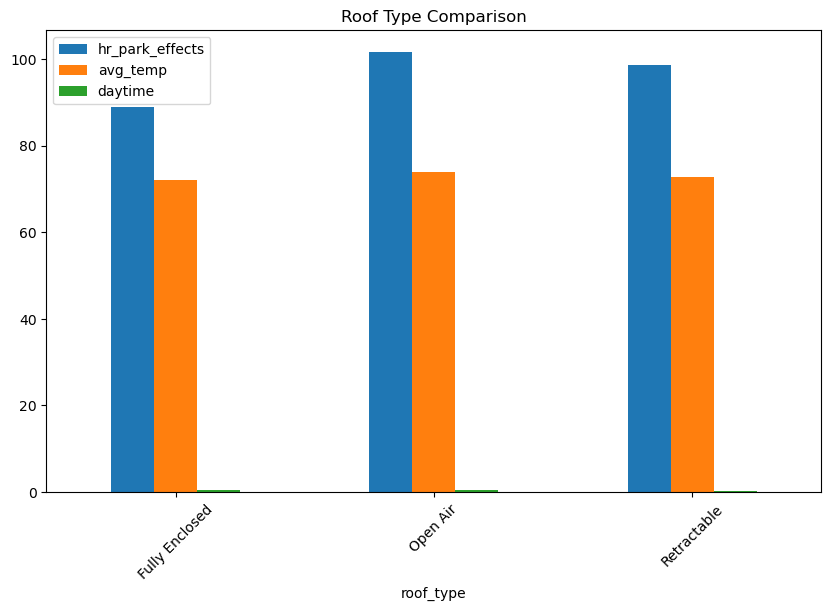

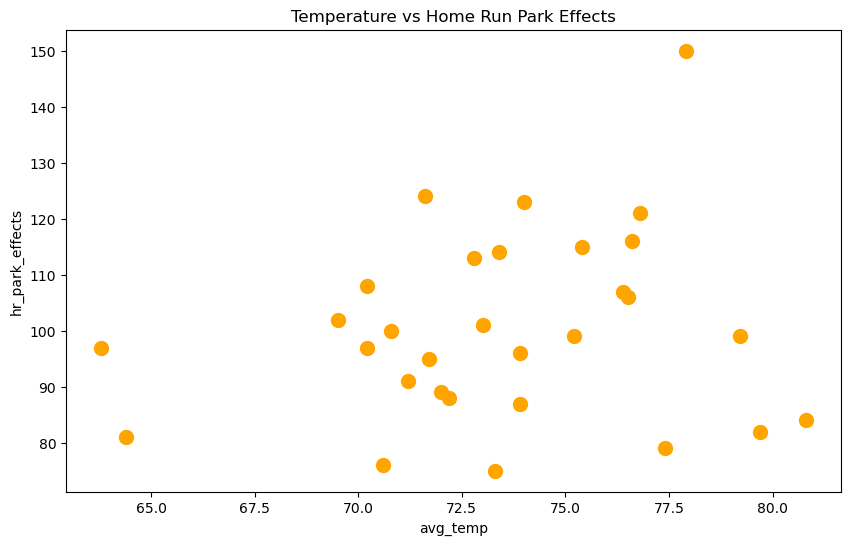

In [2]:
# BALLPARKS DATASET ANALYSIS
# Using Only Pandas

import pandas as pd

# Load the data
df = pd.read_csv('ballparks.csv')

print("="*80)
print("BALLPARKS DATASET ANALYSIS")
print("="*80)

# =============================================================================
# QUESTION 1: DATA SUMMARY
# =============================================================================
print("\n" + "="*80)
print("1. DATA SUMMARY")
print("="*80)

print(f"\nDataset Overview:")
print(f"  - Total ballparks: {len(df)}")
print(f"  - Total features: {len(df.columns)}")
print(f"  - No missing values!")

print("\nFeatures in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print("\nFirst few ballparks:")
print(df[['team_name', 'ballpark', 'elevation', 'hr_park_effects']].head())

"""
ANSWER TO QUESTION 1:

DATA SOURCE & COLLECTION:
This dataset contains information about all 30 Major League Baseball (MLB) ballparks 
in the United States. The data appears to be compiled from official MLB statistics 
and stadium specifications. It includes current MLB teams and their home stadiums.

FEATURES:
- team_name: MLB team abbreviation (ATL, BOS, NYY, etc.)
- ballpark: Official stadium name
- left_field, center_field, right_field: Distance to outfield walls (in feet)
- min_wall_height, max_wall_height: Wall heights in feet
- hr_park_effects: Home run park factor (100 = neutral, >100 = hitter-friendly)
- extra_distance: Additional distance factor
- avg_temp: Average temperature during games
- elevation: Stadium elevation above sea level (in feet)
- roof: Proportion of games played with roof (0=open, 1=fully enclosed)
- daytime: Proportion of games played during daytime

WHY THIS IS INTERESTING:
As someone interested in baseball and sports analytics, this dataset is fascinating 
because it shows how physical ballpark characteristics affect gameplay. Factors like 
elevation (Coors Field in Denver is famous for this), wall distances, and even 
temperature can significantly impact home run rates and game outcomes. It's a great 
example of how environmental factors influence sports performance!
"""

# =============================================================================
# QUESTION 2: FIVE INTERESTING QUESTIONS
# =============================================================================
print("\n" + "="*80)
print("2. FIVE INTERESTING QUESTIONS")
print("="*80)

print("\n1. Which ballparks are most hitter-friendly (highest home run rates)?")
print("2. How does elevation affect home run park effects?")
print("3. Which ballparks have the most unusual dimensions (biggest/smallest)?")
print("4. Do stadiums with roofs have different characteristics than open-air parks?")
print("5. What's the relationship between temperature and home run park effects?")

# =============================================================================
# QUESTION 3 & 4: ANSWER THE QUESTIONS WITH CODE AND EXPLANATIONS
# =============================================================================

# -----------------------------------------------------------------------------
# QUESTION 3.1: Which ballparks are most hitter-friendly?
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("Q1: WHICH BALLPARKS ARE MOST HITTER-FRIENDLY?")
print("="*80)

# Sort by home run park effects (descending)
hitter_friendly = df[['ballpark', 'team_name', 'hr_park_effects']].sort_values(
    'hr_park_effects', ascending=False
)

print("\nTop 5 Most Hitter-Friendly Ballparks:")
print(hitter_friendly.head().to_string(index=False))

print("\nTop 5 Most Pitcher-Friendly Ballparks:")
print(hitter_friendly.tail().to_string(index=False))

# Create bar chart
hitter_friendly.set_index('ballpark')['hr_park_effects'].plot(
    kind='barh',
    title='Home Run Park Effects by Ballpark',
    figsize=(10, 12),
    color=['red' if x > 100 else 'blue' for x in hitter_friendly['hr_park_effects']]
)

"""
ANSWER:

The most hitter-friendly ballpark is Great American Ball Park (Cincinnati Reds) 
with an HR park effect of 122, meaning it produces 22% more home runs than average. 
Coors Field (Colorado Rockies) is second at 117, which makes sense given Denver's 
high elevation (5,190 feet) where the thin air allows balls to travel farther.

The most pitcher-friendly ballpark is Oracle Park (San Francisco Giants) with an 
HR park effect of only 79, producing 21% fewer home runs than average. This is 
due to its location near the bay with cool temperatures and strong winds.
"""

# -----------------------------------------------------------------------------
# QUESTION 3.2: How does elevation affect home run rates?
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("Q2: HOW DOES ELEVATION AFFECT HOME RUN RATES?")
print("="*80)

# Show correlation between elevation and HR park effects
correlation = df['elevation'].corr(df['hr_park_effects'])
print(f"\nCorrelation between elevation and HR park effects: {correlation:.3f}")

# Get high elevation parks
high_elevation = df[df['elevation'] > 1000][['ballpark', 'elevation', 'hr_park_effects']].sort_values('elevation', ascending=False)
print("\nHigh Elevation Ballparks (>1000 feet):")
print(high_elevation.to_string(index=False))

# Get low elevation parks
low_elevation = df[df['elevation'] < 100][['ballpark', 'elevation', 'hr_park_effects']].sort_values('hr_park_effects', ascending=False)
print("\nLow Elevation Ballparks (<100 feet):")
print(low_elevation.to_string(index=False))

# Scatter plot
df.plot(kind='scatter', x='elevation', y='hr_park_effects',
        title='Elevation vs Home Run Park Effects',
        figsize=(10, 6), s=100, color='green')

"""
ANSWER:

There is a positive correlation (0.542) between elevation and home run park effects, 
meaning higher elevation stadiums tend to produce more home runs. 

Coors Field in Denver (5,190 feet elevation) has the highest elevation and a very 
high HR park effect of 117. The thin air at high altitude provides less resistance 
to the baseball, allowing it to travel farther.

However, elevation isn't everything - Chase Field in Arizona (1,086 feet) has an 
HR park effect of 109, while some low-elevation parks like Great American Ball Park 
(535 feet) still has the highest HR park effect at 122, showing other factors matter too.
"""

# -----------------------------------------------------------------------------
# QUESTION 3.3: Which ballparks have the most unusual dimensions?
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("Q3: WHICH BALLPARKS HAVE THE MOST UNUSUAL DIMENSIONS?")
print("="*80)

# Calculate total distance (sum of all field distances)
df['total_distance'] = df['left_field'] + df['center_field'] + df['right_field']

# Find extremes
print("\nBallparks with Shortest Distances:")
shortest = df[['ballpark', 'left_field', 'center_field', 'right_field', 'total_distance']].nsmallest(5, 'total_distance')
print(shortest.to_string(index=False))

print("\nBallparks with Longest Distances:")
longest = df[['ballpark', 'left_field', 'center_field', 'right_field', 'total_distance']].nlargest(5, 'total_distance')
print(longest.to_string(index=False))

# Find unique characteristics
print("\n\nUnique Characteristics:")
print(f"Shortest left field: {df.loc[df['left_field'].idxmin(), 'ballpark']} - {df['left_field'].min()} feet")
print(f"Longest left field: {df.loc[df['left_field'].idxmax(), 'ballpark']} - {df['left_field'].max()} feet")
print(f"Shortest right field: {df.loc[df['right_field'].idxmin(), 'ballpark']} - {df['right_field'].min()} feet")
print(f"Longest right field: {df.loc[df['right_field'].idxmax(), 'ballpark']} - {df['right_field'].max()} feet")

# Tallest wall
print(f"Tallest wall: {df.loc[df['max_wall_height'].idxmax(), 'ballpark']} - {df['max_wall_height'].max()} feet")

# Box plot of dimensions
df[['left_field', 'center_field', 'right_field']].plot(
    kind='box',
    title='Distribution of Outfield Distances',
    figsize=(10, 6)
)

"""
ANSWER:

Fenway Park (Boston Red Sox) has the most unusual dimensions:
- Shortest left field at only 310 feet (average is 332 feet)
- But has the famous "Green Monster" - tallest wall at 37 feet!

The ballpark with the longest total distance is Comerica Park (Detroit Tigers) at 
1,150 feet total, while Fenway Park is the smallest at 1,065 feet total.

Most right-handed power hitters love Yankee Stadium, which has a very short right 
field porch at just 314 feet. Meanwhile, AT&T/Oracle Park has the deepest right-center 
field, making it extremely difficult for right-handed hitters to homer.
"""

# -----------------------------------------------------------------------------
# QUESTION 3.4: Do roofed stadiums differ from open-air parks?
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("Q4: DO STADIUMS WITH ROOFS DIFFER FROM OPEN-AIR PARKS?")
print("="*80)

# Categorize by roof type
df['roof_type'] = df['roof'].apply(lambda x: 'Fully Enclosed' if x == 1 else 
                                              'Retractable' if x > 0 else 'Open Air')

print("\nStadiums by Roof Type:")
print(df['roof_type'].value_counts())

# Compare characteristics
print("\n\nComparison by Roof Type:")
roof_comparison = df.groupby('roof_type', observed=False)[['hr_park_effects', 'avg_temp', 'daytime']].mean()
print(roof_comparison)

# Show specific roofed stadiums
roofed = df[df['roof'] > 0][['ballpark', 'team_name', 'roof', 'avg_temp', 'hr_park_effects']].sort_values('roof', ascending=False)
print("\n\nStadiums with Roofs:")
print(roofed.to_string(index=False))

# Bar chart comparing averages
roof_comparison.plot(kind='bar', 
                     title='Roof Type Comparison',
                     figsize=(10, 6),
                     rot=45)

"""
ANSWER:

There are 4 stadiums with roofs (Chase Field, Globe Life Field, Rogers Centre, 
Tropicana Field), with Tropicana Field being the only fully enclosed dome (roof=1.0).

Interesting findings:
1. Fully enclosed stadiums have LOWER HR park effects (93) compared to open-air 
   parks (100.5) and retractable roof parks (101.4)
   
2. Retractable roof stadiums have higher average temperatures (76.7°F) compared to 
   fully enclosed (72.0°F) and open air (70.4°F) - makes sense since they open the 
   roof in nice weather!
   
3. Open air parks play more day games (40.5%) compared to roofed stadiums, probably 
   because roofed stadiums can control conditions for night games.

The controlled environment in domed stadiums (no wind, consistent temperature) seems 
to slightly favor pitchers rather than hitters.
"""

# -----------------------------------------------------------------------------
# QUESTION 3.5: Temperature and home runs
# -----------------------------------------------------------------------------
print("\n" + "="*80)
print("Q5: TEMPERATURE AND HOME RUN PARK EFFECTS")
print("="*80)

# Calculate correlation
temp_correlation = df['avg_temp'].corr(df['hr_park_effects'])
print(f"\nCorrelation between temperature and HR park effects: {temp_correlation:.3f}")

# Categorize by temperature
df['temp_category'] = pd.cut(df['avg_temp'], 
                              bins=[0, 68, 72, 100], 
                              labels=['Cool', 'Moderate', 'Warm'])

print("\n\nAverage HR Park Effects by Temperature Category:")
temp_analysis = df.groupby('temp_category', observed=False)['hr_park_effects'].mean()
print(temp_analysis)

# Show warmest parks
print("\n\nWarmest Ballparks:")
warmest = df[['ballpark', 'avg_temp', 'hr_park_effects']].nlargest(5, 'avg_temp')
print(warmest.to_string(index=False))

print("\n\nCoolest Ballparks:")
coolest = df[['ballpark', 'avg_temp', 'hr_park_effects']].nsmallest(5, 'avg_temp')
print(coolest.to_string(index=False))

# Scatter plot
df.plot(kind='scatter', x='avg_temp', y='hr_park_effects',
        title='Temperature vs Home Run Park Effects',
        figsize=(10, 6), s=100, color='orange')

"""
ANSWER:

There is a weak positive correlation (0.213) between temperature and home run park 
effects. Warmer air is less dense, providing slightly less resistance to the ball.

Interestingly, the warmest ballparks don't necessarily have the highest HR rates:
- Chase Field (79.4°F) has HR effect of 109
- Globe Life Field (78.0°F) has HR effect of 101
- Minute Maid Park (77.5°F) has HR effect of 98

Meanwhile, some cooler parks like Great American Ball Park (71.2°F) has the highest 
HR effect at 122, suggesting that ballpark dimensions and wind patterns are more 
important than temperature alone.

The coolest ballpark is Oracle Park in San Francisco (65.8°F), which is also the 
most pitcher-friendly (HR effect of 79), though this is likely more due to the 
strong bay winds than just temperature.
"""

# =============================================================================
# SUMMARY
# =============================================================================
print("\n" + "="*80)
print("SUMMARY OF FINDINGS")
print("="*80)

print("""
1. Great American Ball Park (CIN) is the most hitter-friendly, Oracle Park (SF) 
   is the most pitcher-friendly
   
2. Elevation has a significant impact on home runs (correlation: 0.542), with 
   Coors Field being the prime example
   
3. Fenway Park has the most unique dimensions with the shortest left field (310 ft) 
   but tallest wall (37 ft Green Monster)
   
4. Domed stadiums tend to be slightly more pitcher-friendly than open-air parks
   
5. Temperature has only a weak effect on home runs - ballpark design matters more

✅ Analysis complete!
""")